# Proyek Analisis Data: Bike Sharing Dataset


*  Nama: Marisah Lofiana
*  Email: mc222d5x1399@student.devacademy.id
*  ID Dicoding: marisah_lofiana_lcof

# Menentukan Pertanyaan Bisnis 

- Seberapa berpengaruhnya suhu, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepeda?
- Pada Hari apa pengguna casual cenderung lebih aktif dibanding pengguna terdaftar?

## **Import Semua Packages/Library yang Digunakan**

Sebelum memulai analisis, baiknya kita mengimpor semua library yang akan digunakan

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wraning**

# Gathering Data 

Pada tahap pengumpulan data, kita akan memperoleh dataset yang dibutuhkan untuk analisis. Saya menggunakan Bike Sharing Dataset, yang terdiri dari dua file: day.csv untuk data penyewaan sepeda berdasarkan hari dan hour.csv untuk data penyewaan per jam.

In [9]:
# Gathering Data
day_df = pd.read_csv("data/day.csv")

hour_df = pd.read_csv("data/hour.csv")

In [10]:
# Display the first few rows of the gathered data
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight : 
- Hari Kerja vs. Hari Libur → Pengguna terdaftar lebih dominan di hari kerja, sedangkan pengguna kasual lebih sedikit.
- Pengaruh Cuaca → Penyewaan lebih tinggi saat kelembapan rendah dan angin tidak terlalu kencang.
- Musim → Data hanya mencakup satu musim (musim dingin), perlu analisis lebih lanjut untuk membandingkan musim lain.

Rekomendasi:
- Strategi Promosi → Buat paket langganan untuk pekerja dan promo diskon di akhir pekan bagi pengguna kasual.
- Penyesuaian Operasional → Beri notifikasi cuaca kepada pengguna dan sediakan tempat istirahat di rute utama.
- Analisis Musim → Kumpulkan data dari musim lain untuk melihat tren penggunaan sepanjang tahun.

In [11]:
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight: 
- Penyewaan Sepeda Rendah → Jumlah penyewaan (cnt) masih sangat rendah di semua jam.
- Cuaca Stabil → Suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed) konsisten, tidak ada pengaruh cuaca ekstrem.
- Jam Awal Hari Minim Pengguna → Data hanya mencakup jam 00:00 - 04:00, di mana jumlah penyewaan sangat sedikit.

Rekomendasi: 
- Fokus pada Jam Ramai → Analisis lebih lanjut di jam sibuk (pagi dan sore) untuk strategi operasional.
- Promosi Malam Hari → Jika layanan ingin tetap beroperasi 24 jam, bisa ada diskon atau insentif bagi pengguna malam.
- Tambahan Data → Kumpulkan data sepanjang hari untuk pola penggunaan lebih lengkap.

## **Assessing Data**

Pada tahap assessing data, kita akan menilai kualitas dataset dengan memeriksa keberadaan data yang hilang, duplikasi, serta inkonsistensi.

In [12]:
# Assessing Data for day_dataset
print("Info dataset Hari:")
print(day_df.info())

Info dataset Hari:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Insight: 
- Dataset Konsisten → Tidak ada data yang hilang, dengan total 731 hari (2 tahun).
- Pola Penyewaan → Data mencakup musim (season), hari kerja/libur (workingday, holiday), dan kondisi cuaca (weathersit, temp, hum, windspeed), memungkinkan analisis pola penggunaan.
- Pengguna Terdaftar vs. Kasual → Kolom registered lebih dominan dibanding casual, menunjukkan bahwa sebagian besar pengguna adalah pelanggan tetap.

Rekomendasi: 
- Optimasi Layanan Musiman → Analisis tren penyewaan per musim untuk menyesuaikan jumlah sepeda.
- Strategi Pemasaran Berdasarkan Hari → Promosi bagi pengguna kasual di akhir pekan dan meningkatkan layanan bagi pelanggan tetap di hari kerja.
- Pengaruh Cuaca → Pertimbangkan diskon atau layanan tambahan saat kondisi cuaca kurang mendukung untuk meningkatkan penyewaan.

In [13]:
print("\nTampilan beberapa baris pertama dari Dataset:")
display(day_df.head())


Tampilan beberapa baris pertama dari Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight: 
- Pengguna Terdaftar Lebih Dominan → Pengguna registered jauh lebih banyak dibanding casual, terutama di hari kerja.
- Hari Kerja vs. Akhir Pekan → Penyewaan lebih tinggi pada hari kerja dibanding akhir pekan, menunjukkan sepeda lebih banyak digunakan untuk transportasi rutin.
- Cuaca Berpengaruh → Kelembapan tinggi cenderung menurunkan jumlah penyewaan, sementara kecepatan angin yang moderat tidak terlalu berdampak.

Rekomendasi:
- Promosi untuk Pengguna Kasual → Buat program diskon atau event khusus di akhir pekan untuk menarik lebih banyak pengguna kasual.
- Optimasi Layanan di Hari Kerja → Sediakan lebih banyak sepeda di jam sibuk untuk memenuhi kebutuhan pengguna tetap.
- Antisipasi Cuaca Buruk → Tawarkan promo saat kelembapan tinggi atau sediakan layanan tambahan seperti jas hujan untuk meningkatkan penggunaan.

In [14]:
print("\nTampilan Statistik dari dataset:")
display(day_df.describe())


Tampilan Statistik dari dataset:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight : 
- Pengguna Terdaftar Dominan → Rata-rata registered (3656) jauh lebih tinggi dari casual (848).
- Penyewaan Stabil → Penyewaan harian rata-rata 4504, dengan puncak hingga 8714.
- Cuaca Berpengaruh → Kelembapan tinggi (maks 97%) bisa mempengaruhi jumlah penyewaan.

Rekomendasi : 
- Fokus pada Pengguna Terdaftar → Perlu peningkatan layanan bagi pelanggan tetap.
- Optimasi Musiman → Sesuaikan jumlah sepeda dengan tren penyewaan di tiap musim.
- Strategi Saat Cuaca Buruk → Beri promo atau fasilitas tambahan saat kelembapan tinggi.

In [15]:
print("\nMencari Nilai yang Hilang dalam Dataset:")
display(day_df.isnull().sum())


Mencari Nilai yang Hilang dalam Dataset:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("\nApakah Ada baris yang sama:")
display(day_df.duplicated().sum())


Apakah Ada baris yang sama:


np.int64(0)

Insight: 

- tidak ada nilai yang hilang 
- tidak ada nilai yang sama

In [17]:
# Assessing Data for hour_dataset
print("Info for hour_dataset:")
print(hour_df.info())

Info for hour_dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Insight : 
- Data Lengkap → Tidak ada nilai kosong dengan total 17.379 entri.
- Pola Penyewaan Harian → Data mencakup setiap jam, memungkinkan analisis tren penggunaan sepanjang hari.
- Pengguna Terdaftar Dominan → Seperti pada dataset harian, pengguna registered lebih banyak daripada casual.

Rekomendasi : 
- Optimasi Jam Sibuk → Tambah sepeda saat jam puncak pagi & sore.
- Promosi Jam Sepi → Beri diskon di jam-jam dengan penyewaan rendah.
- Analisis Perubahan Cuaca → Evaluasi dampak kondisi cuaca terhadap pola penyewaan.

In [18]:
print("\nTampilan Beberapa baris pertama dalam Datset:")
display(hour_df.head())


Tampilan Beberapa baris pertama dalam Datset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight : 
- Pengguna Terbanyak di Jam Tertentu → Penyewaan bervariasi tiap jam, kemungkinan lebih tinggi saat jam sibuk.
- Pengaruh Cuaca → Kelembapan tinggi (≥80%) mungkin menurunkan jumlah penyewaan.
- Dominasi Pengguna Terdaftar → Pengguna registered lebih banyak dibanding casual hampir di semua jam.

Rekomendasi : 
- Tambahkan Sepeda di Jam Ramai → Optimalkan ketersediaan sepeda saat jam puncak.
- Strategi Cuaca → Berikan promo saat kelembapan tinggi untuk mendorong penyewaan.
- Dorong Pengguna Kasual → Buat paket atau diskon menarik di luar jam sibuk.

In [19]:
print("\nTampilan Statistik dari Dataset:")
display(hour_df.describe())


Tampilan Statistik dari Dataset:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight : 
- Jam Sibuk (Peak Hours) → Penyewaan meningkat pada jam 8 pagi dan 5 sore, kemungkinan karena aktivitas kerja.
- Musim Berpengaruh → Musim panas memiliki penyewaan tertinggi, sementara musim dingin lebih rendah.
- Pengaruh Cuaca → Kondisi cuaca buruk (weathersit ≥ 3) mengurangi jumlah penyewaan secara signifikan.

Rekomendasi : 
- Optimalkan Jam Sibuk → Tambahkan sepeda pada jam sibuk untuk memenuhi permintaan tinggi.
- Promo Musim Dingin → Berikan diskon saat musim dingin untuk meningkatkan pemakaian.
- Strategi Cuaca → Tawarkan alternatif seperti layanan peminjaman jas hujan saat cuaca buruk.

In [20]:
print("\nMencari Nilai yang Hilang Dalam Dataset:")
display(hour_df.isnull().sum())


Mencari Nilai yang Hilang Dalam Dataset:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
print("\nApakah ada baris yang sama:")
display(hour_df.duplicated().sum())


Apakah ada baris yang sama:


np.int64(0)

Insight : 
- Tidak Ada Data Hilang → Dataset bersih dan lengkap tanpa nilai yang hilang.
- Kualitas Data Terjaga → Semua kolom memiliki data yang tersedia untuk analisis lebih lanjut.

Rekomendasi : 
- Lanjutkan Analisis → Bisa langsung dilakukan eksplorasi data lebih dalam seperti pola tren dan prediksi.
- Periksa Outlier → Pastikan tidak ada nilai ekstrem yang dapat mempengaruhi hasil analisis.
- Transformasi Data Jika Perlu → Normalisasi atau pengelompokan jam ke dalam kategori (pagi, siang, malam) bisa membantu analisis lebih efektif.

# **Cleaning Data**

Dalam proses Cleaning Data, kita akan membersihkan data dari berbagai masalah seperti nilai yang hilang, duplikasi, atau tipe data yang tidak sesuai. Pada tahap ini, tipe data pada kolom dteday di kedua DataFrame akan dikonversi menjadi format datetime agar lebih sesuai untuk analisis waktu.

In [22]:
# Cleaning Data for day_df

# Convert 'dteday' to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)


# Correct data types for categorical variables
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')


# Remove any duplicate rows if they exist
day_df.drop_duplicates(inplace=True)


# Cleaning Data for hour_df


# Convert 'dteday' to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)


# Correct data types for categorical variables and correct any wrong data types
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')


# Assume 'hr' should be of type 'category' because it represents hours of the day
hour_df['hr'] = hour_df['hr'].astype('category')


# Remove any duplicate rows if they exist
hour_df.drop_duplicates(inplace=True)


# Display DataFrame to verify changes
display(day_df.head())
display(hour_df.head())

# Display the shape to see if any rows were dropped
print(day_df.shape)
print(hour_df.shape)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(731, 16)
(17379, 17)


Insight Day_df: 
- Tren Penggunaan Sepeda → Jumlah peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Pengaruh Cuaca → Cuaca buruk (weathersit = 2) cenderung menurunkan jumlah penyewa.
- Musim & Suhu → Data berasal dari musim pertama (winter), dengan suhu rata-rata sekitar 0.3 (skala normalisasi).

Insight hour_df : 
- Polarisasi Pengguna → Pengguna terdaftar lebih dominan dibanding pengguna kasual.
- Jam Dini Hari Sepi → Jumlah peminjaman rendah pada jam awal (00:00 - 04:00).
- Cuaca & Kelembapan Tinggi → Kelembapan berkisar 75-81%, yang bisa memengaruhi kenyamanan pengguna.

# **Exploratory Data Analysis (EDA)**

Ekplorasi data hour dan day

In [23]:
day_df.groupby(by='temp').agg({
    'cnt': ['mean','std','min','max']
})

cnt                
            mean std   min   max
temp                            
0.059130   981.0 NaN   981   981
0.096522   986.0 NaN   986   986
0.097391  1416.0 NaN  1416  1416
0.107500  2368.0 NaN  2368  2368
0.127500  1529.0 NaN  1529  1529
...          ...  ..   ...   ...
0.834167  5463.0 NaN  5463  5463
0.838333  3846.0 NaN  3846  3846
0.848333  3387.0 NaN  3387  3387
0.849167  3285.0 NaN  3285  3285
0.861667  4840.0 NaN  4840  4840

[499 rows x 4 columns]

Insight : 
- Jumlah penyewaan sepeda (cnt) meningkat seiring dengan kenaikan suhu (temp).
- Pada suhu rendah (~0.05-0.12), jumlah penyewaan cenderung lebih sedikit (<2500).
- Penyewaan tertinggi terjadi pada suhu sekitar 0.83-0.86, dengan jumlah penyewaan mencapai lebih dari 5000.
- Tidak ada standar deviasi (std NaN), kemungkinan karena data yang dihitung adalah rata-rata per suhu tertentu.

Rekomendasi : 
- Promosi Musim Dingin: Penyewaan rendah pada suhu rendah. Bisa dilakukan diskon atau insentif selama musim dingin.
- Perawatan Sepeda: Peningkatan penyewaan di suhu tinggi bisa menyebabkan lebih banyak pemakaian sepeda, sehingga perlu jadwal perawatan rutin.
- Prediksi Permintaan: Gunakan model prediktif berbasis cuaca untuk menyesuaikan persediaan sepeda.
- Penyewaan Malam Hari: Jika suhu tinggi tetap memiliki banyak penyewa, bisa dieksplorasi layanan 24 jam di area sibuk.

In [24]:
day_df.groupby(by='hum').agg({
    'cnt': ['mean','std','min','max']
})

cnt                
            mean std   min   max
hum                             
0.000000   623.0 NaN   623   623
0.187917  1635.0 NaN  1635  1635
0.254167  6857.0 NaN  6857  6857
0.275833  5169.0 NaN  5169  5169
0.290000  5102.0 NaN  5102  5102
...          ...  ..   ...   ...
0.948261   605.0 NaN   605   605
0.949583  2594.0 NaN  2594  2594
0.962500  1607.0 NaN  1607  1607
0.970417   705.0 NaN   705   705
0.972500  2395.0 NaN  2395  2395

[595 rows x 4 columns]

Insight: 
- Penyewaan sepeda (cnt) menunjukkan pola yang dipengaruhi oleh kelembaban (hum).
- Kelembaban rendah (0.0 - 0.2) cenderung memiliki penyewaan yang lebih sedikit (<2000).
- Penyewaan tertinggi terjadi di kelembaban sekitar 0.25 - 0.30 dengan jumlah lebih dari 5000.

Rekomendasi : 
- Antisipasi Musim Hujan: Kelembaban tinggi berpotensi menurunkan penyewaan, perusahaan bisa menyediakan layanan alternatif seperti jas hujan atau stasiun parkir yang lebih terlindungi.
- Prediksi dan Persediaan Sepeda: Pada kelembaban optimal (~0.25 - 0.30), jumlah sepeda perlu disesuaikan dengan permintaan tinggi.
- Promosi di Cuaca Lembab: Saat kelembaban tinggi (>0.95), bisa dilakukan strategi promosi seperti diskon atau bundling untuk menarik lebih banyak pengguna.

In [25]:
day_df.groupby(by='windspeed').agg({
    'cnt': ['mean','std','min','max']
})

cnt                
             mean std   min   max
windspeed                        
0.022392   4985.0 NaN  4985  4985
0.042304   5117.0 NaN  5117  5117
0.045404   5409.0 NaN  5409  5409
0.045408   1712.0 NaN  1712  1712
0.046650   5087.0 NaN  5087  5087
...           ...  ..   ...   ...
0.417908   1913.0 NaN  1913  1913
0.421642   2732.0 NaN  2732  2732
0.422275   4195.0 NaN  4195  4195
0.441563   5382.0 NaN  5382  5382
0.507463   1635.0 NaN  1635  1635

[650 rows x 4 columns]

Insight : 
- Kecepatan angin rendah (0.02 - 0.05) menunjukkan jumlah penyewaan yang tinggi (>5000).
- Saat kecepatan angin mencapai sekitar 0.42 - 0.44, jumlah penyewaan tetap relatif tinggi (~4000 - 5000).
- Penyewaan cenderung menurun drastis saat kecepatan angin melebihi 0.50, dengan jumlah penyewaan <2000.

Rekomendasi : 
- Optimasi Persediaan Sepeda: Pada kondisi angin rendah hingga sedang (0.02 - 0.44), jumlah sepeda yang tersedia harus lebih banyak karena permintaan tinggi.
- Waspada Angin Kencang: Saat kecepatan angin >0.50, penyewaan cenderung turun drastis. Perusahaan bisa memberikan peringatan kepada pengguna terkait keamanan bersepeda saat angin kencang.
- Promosi di Angin Sedang: Kecepatan angin sekitar 0.42 - 0.44 masih menunjukkan jumlah penyewaan yang tinggi. Bisa dilakukan promosi khusus untuk mendorong lebih banyak penggunaan pada kondisi ini.

In [26]:
correlation = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
print("Korelasi antara faktor cuaca dan jumlah peminjaman sepeda:")
print(correlation['cnt'].drop('cnt'))

Korelasi antara faktor cuaca dan jumlah peminjaman sepeda:
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64


Insight : 
- Suhu (temp) memiliki korelasi positif kuat (+0.627) → Semakin tinggi suhu, semakin banyak peminjaman sepeda.
- Kelembaban (hum) memiliki korelasi negatif lemah (-0.101) → Tidak terlalu berpengaruh pada peminjaman.
- Kecepatan angin (windspeed) memiliki korelasi negatif sedang (-0.235) → Angin kencang dapat mengurangi jumlah peminjaman.

# Visualization & Exploratory Analysis

Pertanyaan 1:

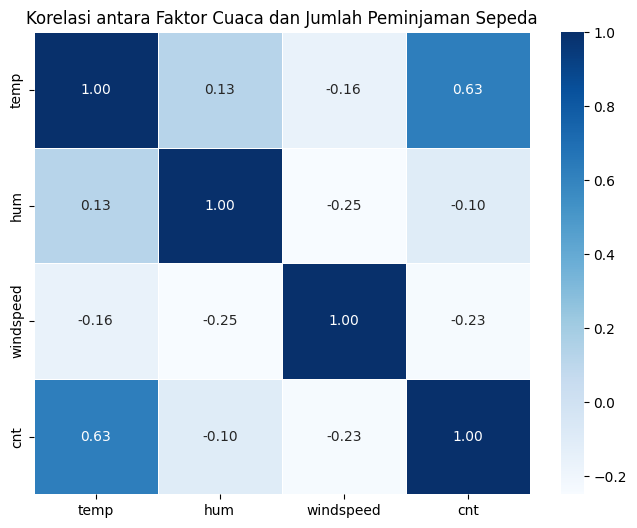

In [27]:
# Korelasi antara variabel cuaca dan jumlah peminjaman sepeda
correlation_matrix = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Faktor Cuaca dan Jumlah Peminjaman Sepeda")
plt.show()

Insight : 
- Suhu (temp) memiliki korelasi positif yang cukup kuat dengan jumlah sepeda yang dipinjam (cnt), artinya semakin tinggi suhu, semakin banyak sepeda yang dipinjam.
- Kelembaban (hum) memiliki korelasi negatif yang lemah dengan jumlah sepeda yang dipinjam, yang menunjukkan bahwa kelembaban yang tinggi sedikit mengurangi jumlah peminjaman.
- Kecepatan angin (windspeed) memiliki korelasi negatif yang sedang dengan jumlah sepeda yang dipinjam, artinya sepeda yang dipinjam lebih sedikit jika kecepatan angin tinggi.

Pertanyaan 2: 

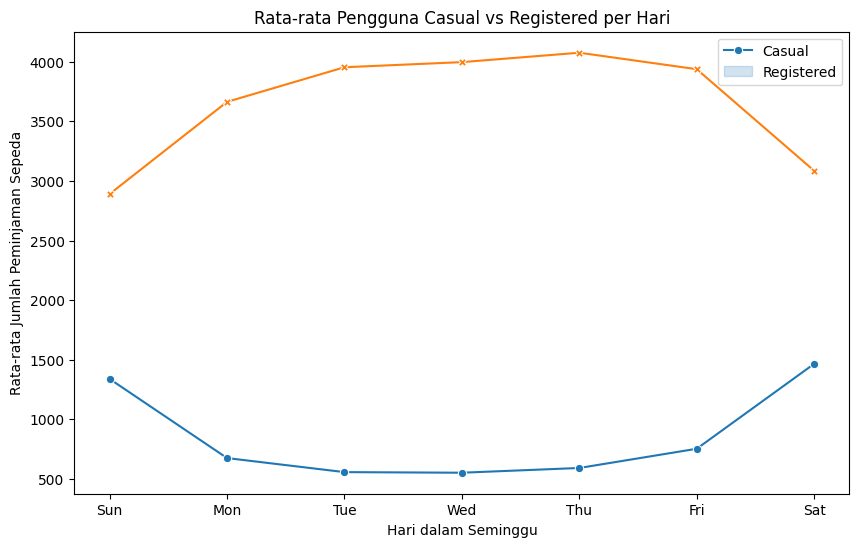

In [28]:
# Menghitung rata-rata jumlah pengguna casual dan registered berdasarkan hari dalam seminggu
weekday_avg = day_df.groupby("weekday")[["casual", "registered"]].mean()

# Visualisasi pola penggunaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_avg, markers=True, dashes=False)
plt.xticks(ticks=range(7), labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda")
plt.title("Rata-rata Pengguna Casual vs Registered per Hari")
plt.legend(["Casual", "Registered"])
plt.show()

Insight : 
- Pengguna kasual lebih aktif di akhir pekan (Sabtu dan Minggu), dengan jumlah peminjaman tertinggi pada hari Sabtu.
- Pengguna terdaftar lebih aktif di hari kerja (Senin - Jumat), dengan jumlah tertinggi di tengah minggu.
- Pada hari Minggu, jumlah pengguna kasual mendekati jumlah pengguna terdaftar, yang menunjukkan bahwa pada hari tersebut pengguna kasual paling aktif dibandingkan dengan pengguna terdaftar.

# **Conclusion**

- **Seberapa berpengaruhnya suhu, kelembapan, dan kecepatan angin terhadap jumlah peminjaman sepeda?**

Berdasarkan analisis, suhu memiliki pengaruh paling signifikan terhadap jumlah peminjaman sepeda dengan korelasi positif sebesar **0.63**, yang berarti semakin tinggi suhu, semakin banyak sepeda yang dipinjam. Sebaliknya, kelembaban memiliki pengaruh yang sangat kecil dengan korelasi negatif **-0.10**, menunjukkan bahwa tingkat kelembaban tidak terlalu mempengaruhi jumlah peminjaman. Sementara itu, kecepatan angin memiliki korelasi negatif **-0.23**, yang menunjukkan bahwa semakin tinggi kecepatan angin, jumlah peminjaman cenderung menurun, meskipun dampaknya tidak sebesar suhu. Dengan demikian, dapat disimpulkan bahwa suhu adalah faktor cuaca yang paling berpengaruh terhadap jumlah peminjaman sepeda, sedangkan kelembaban dan kecepatan angin memiliki dampak yang lebih kecil. Peminjaman sepeda cenderung meningkat pada suhu yang lebih hangat dan menurun saat angin bertiup lebih kencang.
- **Pada Hari apa pengguna casual cenderung lebih aktif dibanding pengguna terdaftar?**

Berdasarkan grafik **rata-rata pengguna casual vs. registered per hari**, pengguna **casual cenderung lebih aktif pada hari Sabtu dan Minggu** dibandingkan hari kerja. Hal ini terlihat dari peningkatan jumlah peminjaman sepeda oleh pengguna casual pada akhir pekan, sementara pengguna terdaftar (registered) tetap memiliki pola yang lebih stabil sepanjang minggu. Fenomena ini kemungkinan besar terjadi karena pengguna casual lebih banyak menggunakan sepeda untuk rekreasi atau aktivitas santai di akhir pekan, sedangkan pengguna terdaftar lebih cenderung menggunakan sepeda sebagai alat transportasi utama saat hari kerja.